**Import all libraries that needed in this project:**
1. Zipfile to extract zip file dataset
2. Pandas to manage data from dataset
3. Matplotlib to visualize graph
4. Seaborn to visualize graph and heatmap
5. Numpy to change value in specific place
6. Sklearn to preprocess data, split data, and create prediction model



In [ ]:
# Import libraries
import zipfile
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

Iris dataset already store in the google drive, so import the dataset using code below.

In [ ]:
# Import Iris dataset
!gdown --id 1_WwiL5ga1BqmLIhCvub7jrXnSbqnyMKV

/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:132: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1_WwiL5ga1BqmLIhCvub7jrXnSbqnyMKV
To: /content/iris_dataset.zip
100% 3.69k/3.69k [00:00<00:00, 13.1MB/s]


In [ ]:
# Extract zip folder
zip_ref = zipfile.ZipFile('iris_dataset.zip', 'r')
zip_ref.extractall('./')
zip_ref.close()

In [ ]:
# Read CSV file and show 5 first data
data = pd.read_csv('Iris.csv')
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


From the first 5 data we know that, There are 5 columns in the dataset:
1. Id
2. SepalLengthCm
3. SepalWidthCm
4. PetalLengthCm
5. PetalWidthCm
6. Species

In [ ]:
# Show columns info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


From the output we know that:
1. There are 150 row in every columns.
2. Non-null indicate there are no null or NAN value in the columns.
3. Id data type is int64.
4. SepalLengthCm, SepalWidthCm, PetalLengthCm, PetalWidthCm data type are float64.
5. Species data type is object or categorical.


---





To make sure there are no null or NAN values and checking duplicated data

In [ ]:
# Checking if there are null or NAN values in every columns
print(data.isnull().sum())

# Checking if there are duplicated data in every row
print(f'\nTotal duplicated rows : {data.duplicated().sum()}')

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

Total duplicated rows : 0




---


Plot the species column and count the value

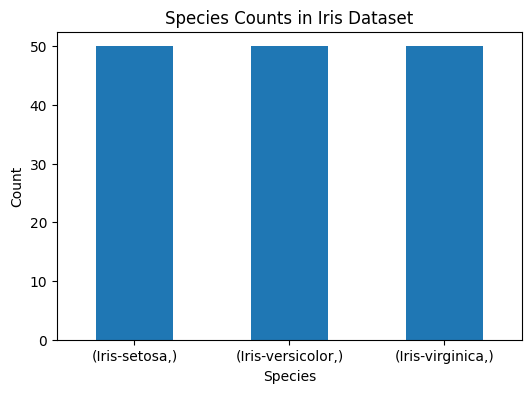

In [ ]:
data_plot = data[['Species']].value_counts()

plt.figure(figsize=(6,4))
data_plot.plot(kind='bar')
plt.xticks(rotation=0)
plt.title('Species Counts in Iris Dataset')
plt.xlabel('Species')
plt.ylabel('Count')
plt.show()

From the bar plot we know that:
1. There are 3 species from Species column. (Iris-setosa, Iris-versicolor, Iris-virginica)
2. Each species have exactly 50 row data, so the data have been distributed well.





---
Next, we divide data into X and y variable to create a classification model. In X variable, we include every columns as the feature except Id and Species. Id column is not use again because Id column is just an identifier to every data and in every row, Id is unique. Species will be include in the y variable as a target classification.


In [ ]:
# Drop column Id and Species for X data
X = data.drop(['Id', 'Species'], axis=1)
y = data[['Species']].values

To see the correlation every feature in the X variable, we create correlation matrix using seaborn heatmap.

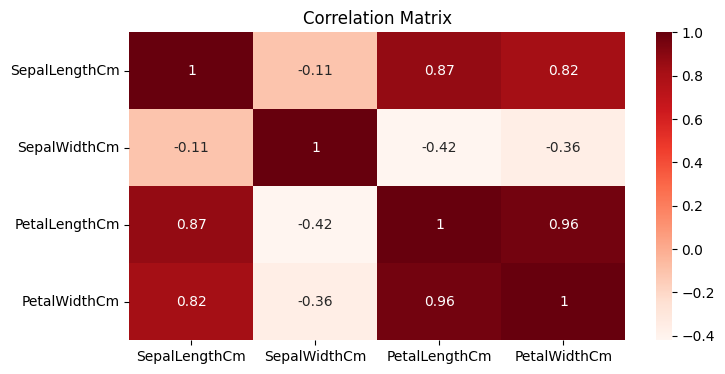

In [ ]:
# Plot the correlation heatmap
correlation_matrix = X.corr()

plt.figure(figsize=(8, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='Reds')
plt.title('Correlation Matrix')
plt.xticks(rotation=0)
plt.show()

From the correlation matrix we know that:
1. SepalLengthCm have good positive correlation with PetalLengthCm and PetalWidthCm.
2. PetalLengthCm have strong positive correlation with PetalWidthCm.

We can conclude from positive correlation is the greater the value of a feature, the greater the value of other features.



---


Here we try to visualize good and strong correlation features. To
visualize, we use scatter plot, also we need to create regression line to prove how strong correlation between two features.

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


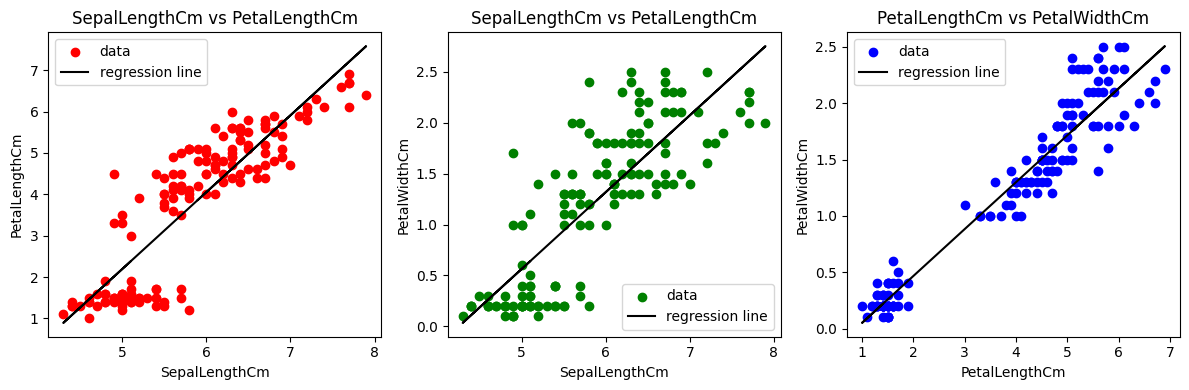

In [ ]:
from sklearn.linear_model import LinearRegression

# Create figure and subplot
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12, 4))

# Create first scatter plot in the first subplot
ax1.scatter(X['SepalLengthCm'], X['PetalLengthCm'], color='r', label='data')
ax1.set_xlabel('SepalLengthCm')
ax1.set_ylabel('PetalLengthCm')
ax1.set_title('SepalLengthCm vs PetalLengthCm')

# Fit linear regression model and plot the regression line
model1 = LinearRegression().fit(X[['SepalLengthCm']], X['PetalLengthCm'])
line1 = model1.predict(np.array(X['SepalLengthCm']).reshape(-1, 1))
ax1.plot(X['SepalLengthCm'], line1, color='black', label='regression line')
ax1.legend()


# Create second scatter plot in the second subplot
ax2.scatter(X['SepalLengthCm'], X['PetalWidthCm'], color='g', label='data')
ax2.set_xlabel('SepalLengthCm')
ax2.set_ylabel('PetalWidthCm')
ax2.set_title('SepalLengthCm vs PetalLengthCm')

# Fit linear regression model and plot the regression line
model2 = LinearRegression().fit(X[['SepalLengthCm']], X['PetalWidthCm'])
line2 = model2.predict(np.array(X['SepalLengthCm']).reshape(-1, 1))
ax2.plot(X['SepalLengthCm'], line2, color='black', label='regression line')
ax2.legend()


# Create third scatter plot in the third subplot
ax3.scatter(X['PetalLengthCm'], X['PetalWidthCm'], color='b', label='data')
ax3.set_xlabel('PetalLengthCm')
ax3.set_ylabel('PetalWidthCm')
ax3.set_title('PetalLengthCm vs PetalWidthCm')

# Fit linear regression model and plot the regression line
model3 = LinearRegression().fit(X[['PetalLengthCm']], X['PetalWidthCm'])
line3 = model3.predict(np.array(X['PetalLengthCm']).reshape(-1, 1))
ax3.plot(X['PetalLengthCm'], line3, color='black', label='regression line')
ax3.legend()


# Show figure
plt.tight_layout()
plt.show()

From the scatter plot we know that :
  1. In the First plot which have good positive correlation, showing that our data are approaching regression line. Our data showing positive correlation. But it still as not good as third plot.
  2. Same with the first plot, in the second plot showing good positive correlation. But it still as not good as third plot.
  3. Third plot which have strongest positive correlation among other features. The data is close enough in regression line. The third plot is the best when we talk about correlation between features.



---


Next, we need to check if there are outliers. Outliers can affect our classification if their count are too much.

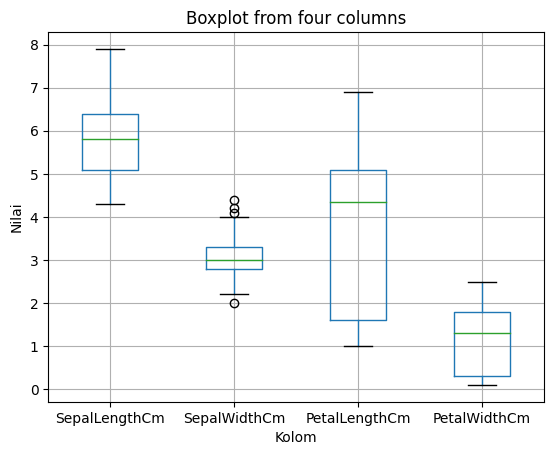

In [ ]:
data.describe()

# Checking if there are outliers using box plot
X.boxplot(column=['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'])
plt.title('Boxplot from four columns')
plt.ylabel('Nilai')
plt.xlabel('Kolom')
plt.show()

From boxplot we know there are four outliers data in SepalWidthCm column. There are severals way to replace outliers data like mean, median, or mode. In this case we need to replace outliers data with median because median is the robust way when we facing outliers.



---


First we find which data have outliers in the SepalWidthCm column. We use quantile(0.25) and quantile(0.75) to set the treshold in identify the outliers. Then we calculate median in the SepalWidthCm column and change the outliers data into median data.

In [ ]:
# Calculate quantiles
Q1 = X['SepalWidthCm'].quantile(0.25)
Q3 = X['SepalWidthCm'].quantile(0.75)
IQR = Q3 - Q1

# Decide top threshold and bottom threshold for outliers
batas_bawah = Q1 - 1.5 * IQR
batas_atas = Q3 + 1.5 * IQR

# Identify outliers data
outliers = X[(X['SepalWidthCm'] < batas_bawah) | (X['SepalWidthCm'] > batas_atas)]
print("Outliers:\n", outliers)

Outliers:
     SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
15            5.7           4.4            1.5           0.4
32            5.2           4.1            1.5           0.1
33            5.5           4.2            1.4           0.2
60            5.0           2.0            3.5           1.0


In [ ]:
# Calculate median
median = X['SepalWidthCm'].median()

# Replace outliers with median
X['SepalWidthCm'] = np.where((X['SepalWidthCm'] < batas_bawah) | (X['SepalWidthCm'] > batas_atas), median, X['SepalWidthCm'])

To make sure there are no outliers in all columns, we try to visualize again with boxplot.

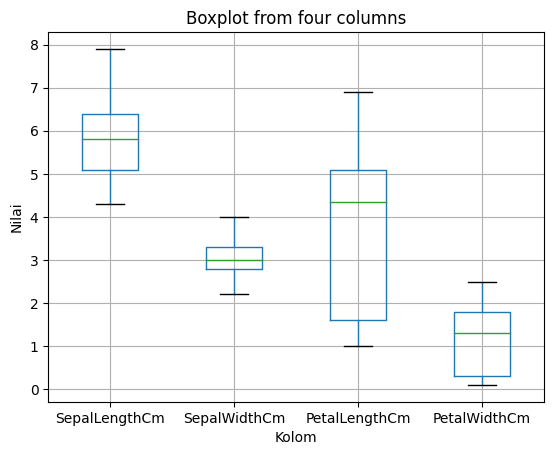

In [ ]:
data.describe()

# Checking if there are outliers using box plot
X.boxplot(column=['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'])
plt.title('Boxplot from four columns')
plt.ylabel('Nilai')
plt.xlabel('Kolom')
plt.show()

**Next we can create classification model to predict incoming data.**



---


First preprocess X data using StandardScaler and y using labelEncoder. Then split the data into train and test data.

In [ ]:
standard_scaler = StandardScaler()
label_encoder = LabelEncoder()

X = standard_scaler.fit_transform(X)
y = label_encoder.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Next we try to create models with different kind of classification model. We are doing this because we need to know which model have best performance to predict data. In here we are just using default model, not doing hyperparameter tuning.

In [ ]:
models = {'Logistic Regression' : LogisticRegression(multi_class='multinomial'),
          'K-Nearest Neighbors' : KNeighborsClassifier(),
          'Support Vector Machine' : SVC(),
          'Decision Tree' : DecisionTreeClassifier(),
          'Gaussian Naive Bayes' : GaussianNB(),
          'Random Forest Classifier' : RandomForestClassifier()}

highest_accuracy = 0.0

for key, value in models.items():
  model = value
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)

  accuracy = accuracy_score(y_pred, y_test)
  print(f'{key} accuracy score : {accuracy}')

  if accuracy > highest_accuracy:
    highest_accuracy = accuracy
    highest_accuracy_model = key

print(f'\nHighest accuracy is {highest_accuracy_model}')

Logistic Regression accuracy score : 1.0
K-Nearest Neighbors accuracy score : 1.0
Support Vector Machine accuracy score : 1.0
Decision Tree accuracy score : 1.0
Gaussian Naive Bayes accuracy score : 1.0
Random Forest Classifier accuracy score : 1.0

Highest accuracy is Logistic Regression


From here we know what is the best model at predict the data.



---


 Next we create confusion matrix to evaluate our model. In here we choose the best model at predict the data.

['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


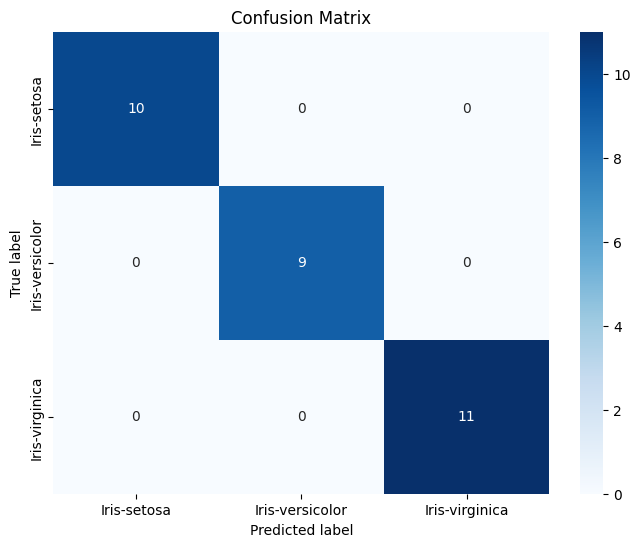

In [ ]:
model = models[highest_accuracy_model]
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

conf_matrix = confusion_matrix(y_pred, y_test)
species_names = label_encoder.inverse_transform([0, 1, 2])

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=species_names, yticklabels=species_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

From confusion matrix we know that the test data is not the same count in every labels. This can be happen because we use random_state at train_test_split to split data.



---


For more details about model perform, we can create classification report.

In [ ]:
class_report = classification_report(y_pred, y_test)
print(class_report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

